In [2]:
#MAKE_volcano_plot_Rscript_pointcheck
#
#Deriviated from MAKE_volcano_plot_Rscript.
#Debug & dot double-check purpose.

library(ggplot2)
library(ggrepel)

[1] "../../../analysis/statistics/linear_regression/metabolomics/linear_regression.cVSneg.metabolomics.tsv"
[1] 1061    2
[1] "#####"
[1] "metabolomics"
[1] "cVSneg"
[1] "#####"


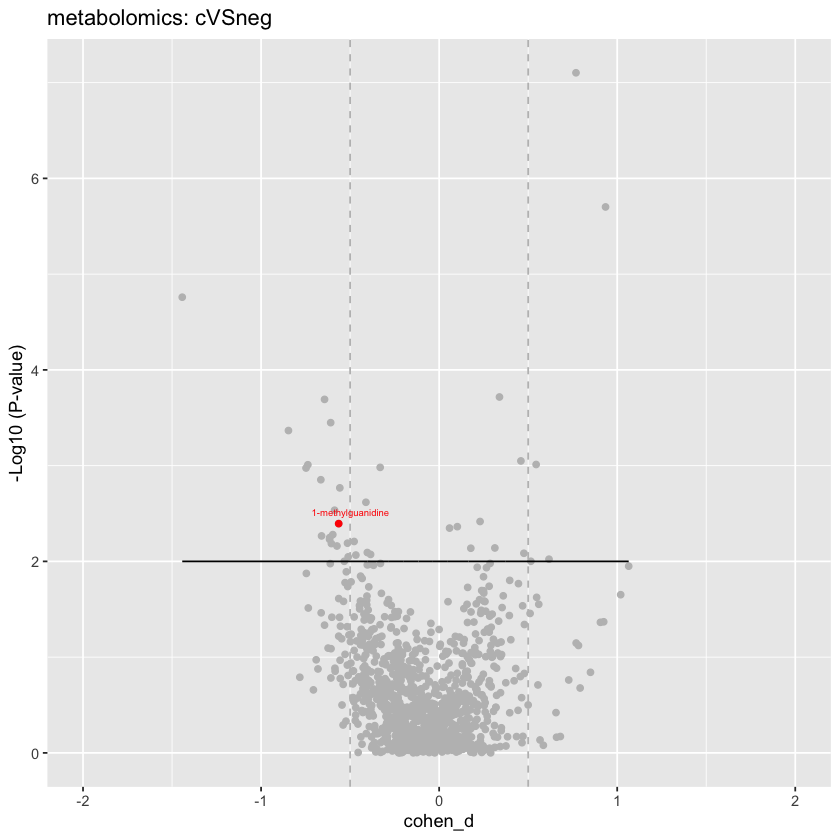

In [3]:
# omics_list = c("metabolomics","proteomics")
omics_list = c("metabolomics")
# condition_list = c("cVSpos","cVSneg","negVSpos")
condition_list = c("cVSneg")
cohend_threshold = 0.5

for (omics in omics_list){
    
    for (condition in condition_list){
        
        # Load linear regression result file
        data_file = paste("../../../analysis/statistics/linear_regression/", omics,  #
                          "/linear_regression.", condition, ".", omics, ".tsv", sep="")

        print (data_file)
        input_df = read.csv(data_file, sep="\t", header=TRUE, row.names=1)
        
        # Set x and y axes for the volcano plot
        x_axis <- input_df$cohen_d
        y_axis <- -log10(input_df$adj_pval)  # Convert p-values to –log10 scale

        # Set axis labels and colors based on condition
        if (condition == "cVSpos"){
            xaxis_label <- "Effect size (Cohen's D): ACPA+ RA vs. Control"
            numerator_color = "#636363"         # ACPA+ color
            denominator_color = "#78AF3F"       # Control color
        }
        if (condition == "cVSneg"){
            xaxis_label <- "Effect size (Cohen's D): ACPA– RA vs. Control"
            numerator_color = "#B57623"         # ACPA– color
            denominator_color = "#78AF3F"       # Control color
        }
        # print (input_df)
        gene_list <- rownames(input_df)  # Feature names

        df <- data.frame(
            cohen_d = x_axis,
            adj_pval = y_axis,
            row.names = gene_list
        )
        print (dim(df))
        df$genes <- gene_list  # add gene names as a column too (for ggplot)
       # Set y-axis limits and p-value threshold line
        ylim_bottum <- 0
        ylim_top <- 6
        # log2pval_threshold = 1.30103  # = -log10(0.05)
        log2pval_threshold = 2.0  # = -log10(0.01)
        
        # Filter s

        #assign color of the dot (feature)
        find_feature <- subset(df, genes == "1-methylguanidine") 
        
        #Debug
        print ('#####')
        print (omics)
        print (condition)
        print ('#####')
        #Debug
        # Set figure title and output path
        figure_title = paste(omics,": ", condition, sep="")
        output_pdf = paste("../../../analysis/statistics/linear_regression/volcano_plot/", omics,
                            ".", condition, ".volcano.label.point.pdf", sep="")
        
        # Save volcano plot to PDF
        pdf(output_pdf)
        # Draw volcano plot
        check_plot <- ggplot(df, aes(x=cohen_d, y=adj_pval))+ coord_cartesian(xlim=c(-2,2))+ 
        geom_point(colour="grey") + 
        geom_point(data = find_feature, colour='red') +
        geom_line(aes(y=2))+
        geom_vline(xintercept = 0.5, colour="#BEBEBE", linetype="dashed") +
        geom_vline(xintercept = -0.5, colour="#BEBEBE", linetype="dashed") +
        geom_text_repel(data=find_feature, aes(cohen_d, adj_pval, label=genes), colour='red', size=2) +
        ylab("-Log10 (P-value)") +
        ggtitle(figure_title)
        print (check_plot)

        dev.off()
    }
    print (check_plot)
}


### 